In [2]:
# Veronika Wendler
#ID:20375377
import numpy as np 
import matplotlib as plt
import pandas as pd 
import os
import matplotlib.pyplot as plt


In [ ]:
#CISC 151: Assignment 2

#For the dataset, adultsData.csv (in the assignment folder), it is required to analyze the dataset to answer the following questions.
#Follow the data analysis process and highlight the different phases you follow throughout your analysis. 
#Incorporate visualisation in your analysis and add comments that conclude your findings. 
#Then, upload your final program as a single Jupyter Notebook file.

#How many men and women are represented in this dataset?
 
#What is the average age of women?
 
#What is the percentage of German citizens and Canadian citizens?
 
#What are the mean and standard deviation of the age for those who earn more than 50K per year and those who earn less than 50K per year?
 
#What is the education level of people who earn more than 50K? Is it true that they have at least high school education?
 
#Display age statistics for each race and each gender. Use groupby() and describe(). Find the maximum age of men and women in each race group.
 
#Among whom is the proportion of those who earn greater than 50K: married or single? Consider as married those who have a marital-status starting with Married (e.g., Married-civ-spouse, Married-spouse-absent, Married-AF-spouse, etc.).
 
#What is the maximum number of hours a person works per week? How many people work such a number of hours, and what is the percentage of those who earn more than 50K among them?
 
#Count the average time of work (hours-per-week) for those who earn less than 50K and more than 50K for each country. Compare these averages for Japan and Canada.
 

In [4]:
# Q1 How many men and women are represented in this dataset?
df = pd.read_csv('adultsData.csv')
print(df.head())

df['sex'] = df['sex'].str.lower()

# we print the  unique values in the "sex" column and convert to lowercase, then we count them
print(df['sex'].unique())

men = df['sex'].str.contains('male', case=False).sum()
women = df['sex'].str.contains('female', case=False).sum()

# Print the count
print("Number of men: ", men)
print("Number of women: ", women)



   Unnamed: 0  age          workclass  fnlwgt   education  education-num  \
0           0   39          State-gov   77516   Bachelors             13   
1           1   50   Self-emp-not-inc   83311   Bachelors             13   
2           2   38            Private  215646     HS-grad              9   
3           3   53            Private  234721        11th              7   
4           4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salar

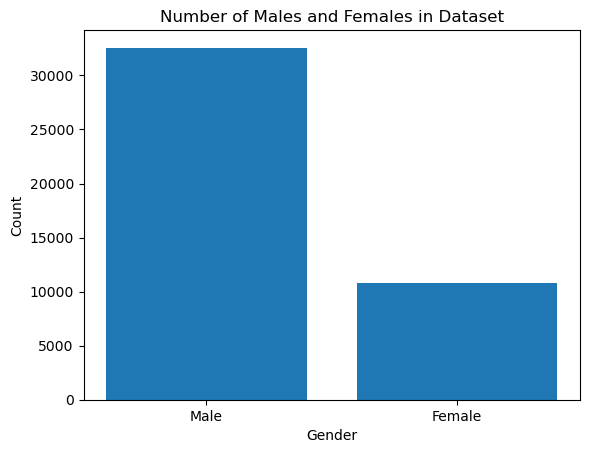

In [6]:

# Q1 Create a bar plot
plt.bar(['Male', 'Female'], [men, women])
plt.title('Number of Males and Females in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Number of men:  32561 SE:  180.44666802132977
Number of women:  10771 SE:  103.78342834961659


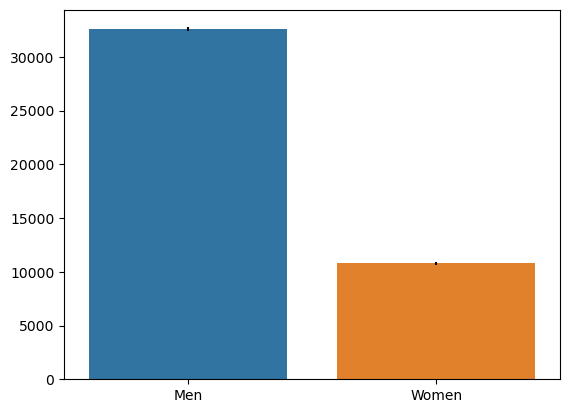

In [14]:
# Q1 this code attempts to also display standard error however, the error bars are very small
# Compute standard errors
se_men = np.sqrt(men)
se_women = np.sqrt(women)

# Print the counts and standard errors
print("Number of men: ", men, "SE: ", se_men)
print("Number of women: ", women, "SE: ", se_women)

# Create a bar plot of the counts
import seaborn as sns

sns.barplot(x=['Men', 'Women'], y=[men, women], yerr=[se_men, se_women])
plt.show()

In [44]:
# Q2: Subset the data frame to only include women
women_data = df[df['sex'] == ' Female']

# first few rows of the subsetted data frame
print(women_data.head())

    Unnamed: 0  age workclass  fnlwgt   education  education-num  \
4            4   28   Private  338409   Bachelors             13   
5            5   37   Private  284582     Masters             14   
6            6   49   Private  160187         9th              5   
8            8   31   Private   45781     Masters             14   
12          12   23   Private  122272   Bachelors             13   

            marital-status        occupation    relationship    race      sex  \
4       Married-civ-spouse    Prof-specialty            Wife   Black   Female   
5       Married-civ-spouse   Exec-managerial            Wife   White   Female   
6    Married-spouse-absent     Other-service   Not-in-family   Black   Female   
8            Never-married    Prof-specialty   Not-in-family   White   Female   
12           Never-married      Adm-clerical       Own-child   White   Female   

    capital-gain  capital-loss  hours-per-week  native-country  salary  
4              0             0 

In [43]:
women_avg_age = women_data['age'].mean()
print("Average age of women: ", women_avg_age)


Average age of women:  36.85823043357163


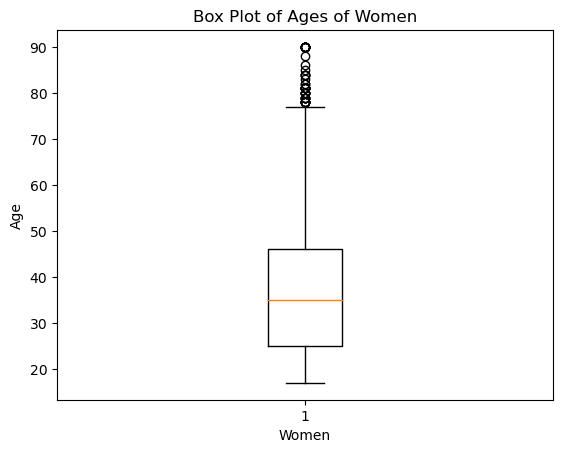

In [46]:
# Q2 Create a box plot of the ages of women
import matplotlib.pyplot as plt

plt.boxplot(women_data['age'])

# Set the axis labels and title
plt.xlabel('Women')
plt.ylabel('Age')
plt.title('Box Plot of Ages of Women')

# Display the plot
plt.show()

In [47]:
# Q3 What is the percentage of German citizens and Canadian citizens?

df['sex'] = df['sex'].str.lower()

# Print the unique values in the "native-country" column
print(df['native-country'].unique())

# Filter the data for German and Canadian citizens
german_data = df[df['native-country'] == ' Germany']
canadian_data = df[df['native-country'] == ' Canada']

# Calculate the percentage of German and Canadian citizens
german_percentage = (len(german_data) / len(df)) * 100
canadian_percentage = (len(canadian_data) / len(df)) * 100

# Print the percentages
print("Percentage of German citizens: ", german_percentage)
print("Percentage of Canadian citizens: ", canadian_percentage)


[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
Percentage of German citizens:  0.42074874850281013
Percentage of Canadian citizens:  0.371610208531679


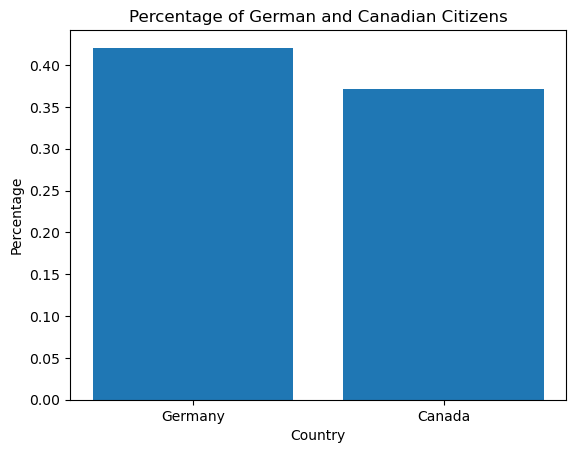

In [50]:

# Q3 : Compute the percentage of German and Canadian citizens
german_percent = counts[' Germany'] / counts.sum() * 100
canadian_percent = counts[' Canada'] / counts.sum() * 100

# bar plot of the percentages
plt.bar(['Germany', 'Canada'], [german_percent, canadian_percent])
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage of German and Canadian Citizens')

plt.show()


In [51]:
# Q4 What are the mean and standard deviation of the age for those who earn more than 50K per year and those who earn less than 50K per year?

#mean and standard deviation of the age for those who earn more than 50K per year
high_income = df[df['salary'] == ' >50K']
high_income_age_mean = high_income['age'].mean()
high_income_age_std = high_income['age'].std()

print("Mean age for those who earn more than 50K per year: {:.2f}".format(high_income_age_mean))
print("Standard deviation of age for those who earn more than 50K per year: {:.2f}".format(high_income_age_std))

#  mean and standard deviation of the age for those who earn less than 50K per year
low_income = df[df['salary'] == ' <=50K']
low_income_age_mean = low_income['age'].mean()
low_income_age_std = low_income['age'].std()

print("Mean age for those who earn less than 50K per year: {:.2f}".format(low_income_age_mean))
print("Standard deviation of age for those who earn less than 50K per year: {:.2f}".format(low_income_age_std))


Mean age for those who earn more than 50K per year: 44.25
Standard deviation of age for those who earn more than 50K per year: 10.52
Mean age for those who earn less than 50K per year: 36.78
Standard deviation of age for those who earn less than 50K per year: 14.02


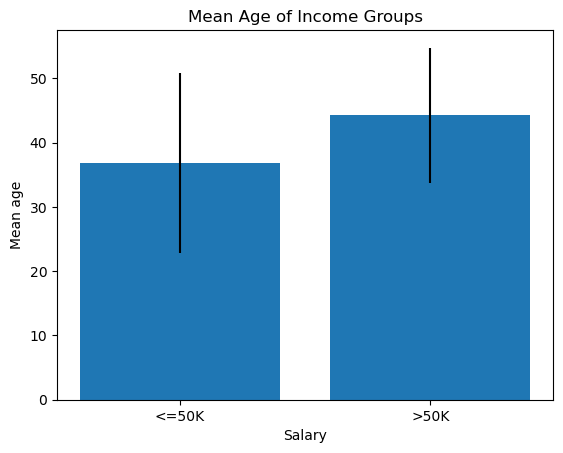

In [52]:

# bar plot of the mean ages for high and low income earners
means = [low_income_age_mean, high_income_age_mean]
stds = [low_income_age_std, high_income_age_std]
labels = ['<=50K', '>50K']
plt.bar(labels, means, yerr=stds)
plt.xlabel('Salary')
plt.ylabel('Mean age')
plt.title('Mean Age of Income Groups')
plt.show()


In [58]:
#Q5 What is the education level of people who earn more than 50K? Is it true that they have at least high school education?

high_income_education = high_income['education'].unique()
print("Education level of people who earn more than 50K per year:")
print(high_income_education)
h = all(x in high_income_education for x in [' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Doctorate'])
print("Do they have at least a high school education?", h )


Education level of people who earn more than 50K per year:
[' HS-grad' ' Masters' ' Bachelors' ' Some-college' ' Assoc-voc'
 ' Doctorate' ' Prof-school' ' Assoc-acdm' ' 7th-8th' ' 12th' ' 10th'
 ' 11th' ' 9th' ' 5th-6th' ' 1st-4th']
Do they have at least a high school education? True


                               count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   ma

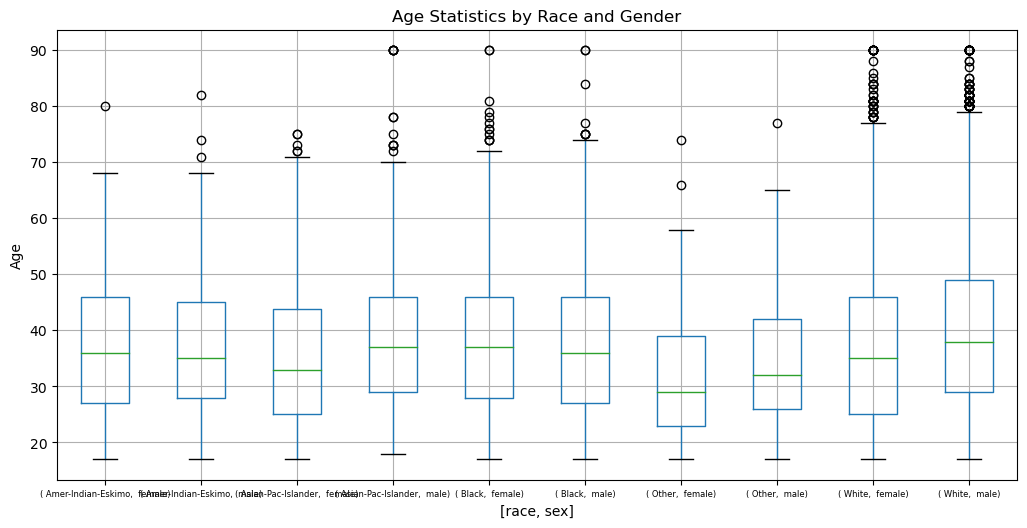

In [72]:
# Q6 Display age statistics for each race and each gender. Use groupby() and describe().

df['sex'] = df['sex'].str.lower()

# Group the data by race and sex, and compute age statistics using describe()
# Print the age statistics
# Find the maximum age of men and women in each race group

age_stats = df.groupby(['race', 'sex'])['age'].describe()

print(age_stats)

max_age = df.groupby(['race', 'sex'])['age'].max()

# maximum age
print(max_age)

# age statistics using boxplots
box = df.boxplot(column='age', by=['race', 'sex'], figsize=(12,6))
plt.suptitle('')
plt.title('Age Statistics by Race and Gender')
plt.ylabel('Age')
box.tick_params(axis='x', labelsize=6)
plt.show()
plt.show()


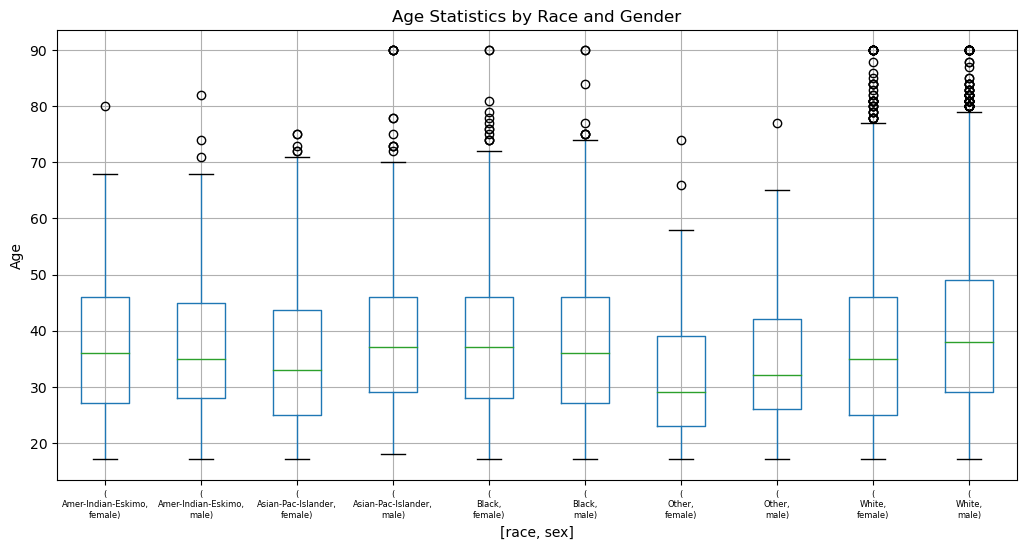

In [73]:
#better visualization
box = df.boxplot(column='age', by=['race', 'sex'], figsize=(12,6))
plt.suptitle('')
plt.title('Age Statistics by Race and Gender')
plt.ylabel('Age')

box.tick_params(axis='x', labelsize=6)
new_labels = []
for label in box.get_xticklabels():
    if ' ' in label.get_text():
        new_labels.append('\n'.join(label.get_text().split()))
    else:
        new_labels.append(label.get_text())
box.set_xticklabels(new_labels)

plt.show()


In [90]:
# Q7 Among whom is the proportion of those who earn greater than 50K: married or single? 
#Consider as married those who have a marital-status starting with Married
# (e.g., Married-civ-spouse, Married-spouse-absent, Married-AF-spouse, etc.).
# Subset the data into those who earn more than 50K per year and those who earn less than 50K per year

# 1 Calculate the proportion of those who are married and earn more than 50K
#  2 Calculate the proportion of those who are not married and earn more than 50K


high_income = df[df['salary'] == ' >50K']
low_income = df[df['salary'] == ' <=50K']

married_high_income = high_income[high_income['marital-status'].str.startswith(' Married')]
prop_married_high_income = len(married_high_income) / len(high_income)

not_married_high_income = high_income[~high_income['marital-status'].str.startswith(' Married')]
prop_not_married_high_income = len(not_married_high_income) / len(high_income)

print("Proportion of married individuals earning more than 50K: {:.2f}%".format(prop_married_high_income*100))
print("Proportion of not married individuals earning more than 50K: {:.2f}%".format(prop_not_married_high_income*100))


Proportion of married individuals earning more than 50K: 85.91%
Proportion of not married individuals earning more than 50K: 14.09%


The maximum number of hours a person works per week is: 99
Number of people who work the maximum number of hours per week: 85
Percentage of those who earn more than 50K among the maximum hour workers: 29.41%


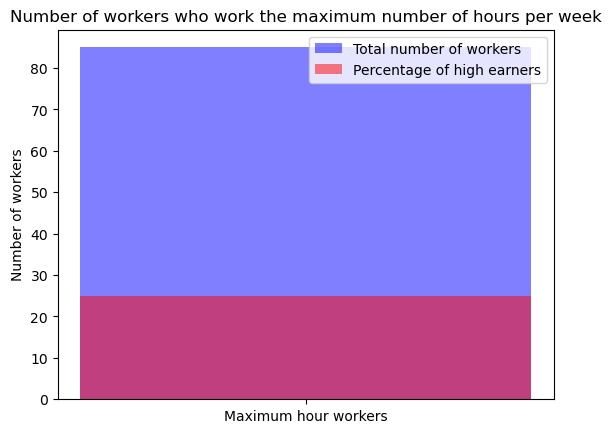

In [95]:
# Q8 What is the maximum number of hours a person works per week?
# How many people work such a number of hours, and what is the percentage of those who earn more than 50K among them?

# 1 Calculate the number of people who work the maximum number of hours per week
# 2 Calculate the percentage of those who earn more than 50K among the maximum hour workers


max_hours = df['hours-per-week'].max()
print("The maximum number of hours a person works per week is:", max_hours)

max_hours_workers = df[df['hours-per-week'] == max_hours]
num_max_hours_workers = len(max_hours_workers)
print("Number of people who work the maximum number of hours per week:", num_max_hours_workers)

prop_max_hours_high_income = len(max_hours_workers[max_hours_workers['salary'] == ' >50K']) / num_max_hours_workers
print("Percentage of those who earn more than 50K among the maximum hour workers: {:.2f}%".format(prop_max_hours_high_income*100))

fig, ax = plt.subplots()
ax.bar(['Maximum hour workers'], [num_max_hours_workers], color='b', alpha=0.5, label='Total number of workers')
ax.bar(['Maximum hour workers'], [num_max_hours_workers*prop_max_hours_high_income], color='r', alpha=0.5, label='Percentage of high earners')

# Add labels and titles
ax.set_ylabel('Number of workers')
ax.set_title('Number of workers who work the maximum number of hours per week')
ax.legend()

plt.show()

Japan average time for high earners: 47.958333333333336
Japan average time for low earners: 41.0
Canada average time for high earners: 45.64102564102564
Canada average time for low earners: 37.91463414634146


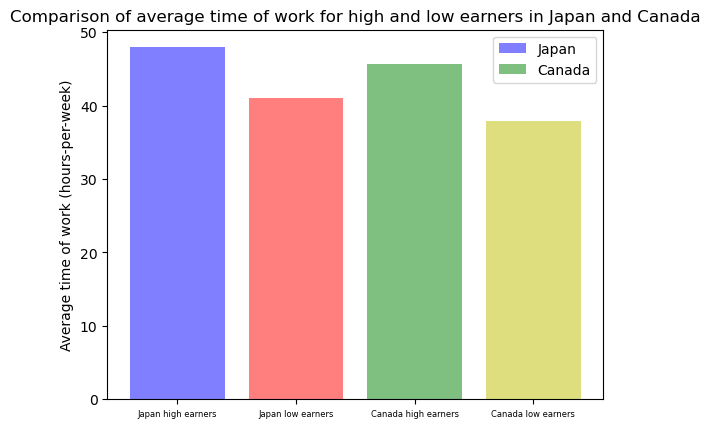

In [100]:
# 9 #Count the average time of work (hours-per-week) for those who earn less than 50K and more than 50K for each country.
# Compare these averages for Japan and Canada.
# Create a bar plot to visualize the results

# average time of work for each country and salary group

high_income = df[df['salary'] == ' >50K']
low_income = df[df['salary'] == ' <=50K']

high_income_avg_time = high_income.groupby('native-country')['hours-per-week'].mean()
low_income_avg_time = low_income.groupby('native-country')['hours-per-week'].mean()

# averages for Japan and Canada

japan_hi = high_income_avg_time[' Japan']
japan_lo = low_income_avg_time[' Japan']
canada_hi = high_income_avg_time[' Canada']
canada_lo = low_income_avg_time[' Canada']

print("Japan average time for high earners:", japan_hi)
print("Japan average time for low earners:", japan_lo)
print("Canada average time for high earners:", canada_hi)
print("Canada average time for low earners:", canada_lo)

# bar plot to visualize the results
fig, box = plt.subplots()
box.bar(['Japan high earners', 'Japan low earners'], [japan_hi, japan_lo], color=['b', 'r'], alpha=0.5, label='Japan')
box.bar(['Canada high earners', 'Canada low earners'], [canada_hi, canada_lo], color=['g', 'y'], alpha=0.5, label='Canada')
box.tick_params(axis='x', labelsize=6)

box.set_ylabel('Average time of work (hours-per-week)')
box.set_title('Comparison of average time of work for high and low earners in Japan and Canada')
box.legend()

plt.show()


Japan average time for high earners: 47.958333333333336
Japan average time for low earners: 41.0
Japan standard deviation for high earners: 16.120414188946523
Japan standard deviation for low earners: 11.90275916229828
Canada average time for high earners: 45.64102564102564
Canada average time for low earners: 37.91463414634146
Canada standard deviation for high earners: 12.066672631428355
Canada standard deviation for low earners: 13.012056346263101


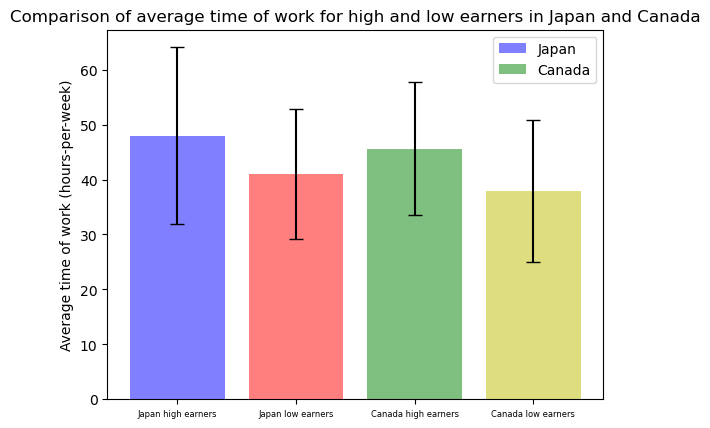

In [103]:
# bar plot with additional standard deviations 

high_income_avg_time = high_income.groupby('native-country')['hours-per-week'].agg([np.mean, np.std])
low_income_avg_time = low_income.groupby('native-country')['hours-per-week'].agg([np.mean, np.std])

japan_hi_mean = high_income_avg_time.loc[' Japan', 'mean']
japan_hi_std = high_income_avg_time.loc[' Japan', 'std']
japan_lo_mean = low_income_avg_time.loc[' Japan', 'mean']
japan_lo_std = low_income_avg_time.loc[' Japan', 'std']
canada_hi_mean = high_income_avg_time.loc[' Canada', 'mean']
canada_hi_std = high_income_avg_time.loc[' Canada', 'std']
canada_lo_mean = low_income_avg_time.loc[' Canada', 'mean']
canada_lo_std = low_income_avg_time.loc[' Canada', 'std']

print("Japan average time for high earners:", japan_hi_mean)
print("Japan average time for low earners:", japan_lo_mean)
print("Japan standard deviation for high earners:", japan_hi_std)
print("Japan standard deviation for low earners:", japan_lo_std)
print("Canada average time for high earners:", canada_hi_mean)
print("Canada average time for low earners:", canada_lo_mean)
print("Canada standard deviation for high earners:", canada_hi_std)
print("Canada standard deviation for low earners:", canada_lo_std)

fig, ax = plt.subplots()
ax.bar(['Japan high earners', 'Japan low earners'], [japan_hi_mean, japan_lo_mean], yerr=[japan_hi_std, japan_lo_std], capsize=5, color=['b', 'r'], alpha=0.5, label='Japan')
ax.bar(['Canada high earners', 'Canada low earners'], [canada_hi_mean, canada_lo_mean], yerr=[canada_hi_std, canada_lo_std], capsize=5, color=['g', 'y'], alpha=0.5, label='Canada')

ax.tick_params(axis='x', labelsize=6)

ax.set_ylabel('Average time of work (hours-per-week)')
ax.set_title('Comparison of average time of work for high and low earners in Japan and Canada')
ax.legend()

plt.show()
